<a href="https://colab.research.google.com/github/Normal-case/DeepLearning/blob/master/MNIST_CNN_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# X_train 4차원 배열로 변경
# X_train.reshape(샘플개수, 샘플줄, 샘플칸, RGB 채널수)
# X_train.reshape(-1, 28, 28, 1) : 샘플개수 생략, 줄 28, 칸 28, 채널 개수 1
X_train = X_train.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [5]:
# y_train.reshape() : 1차원 배열을 2차원 배열로 변환
# y_train.reshape(1, -1) : 2차원 배열로 변환 => 1행으로만 구성
# y_train.reshape(-1, 1) : 2차원 배열로 변환 => 1열로만 구성
y_train = y_train.reshape(-1, 1)
y_train.shape

(60000, 1)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_test = X_test.reshape(-1, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [8]:
y_test = y_test.reshape(-1, 1)
y_test

array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=uint8)

In [9]:
print('학습셋 이미지 수 : {}개'.format(X_train.shape[0]))
print('테스트셋 이미지 수 : {}개'.format(X_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


In [10]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [11]:
y_train_onehot = enc.transform(y_train).toarray()
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [12]:
y_train_onehot = np.array(y_train_onehot, dtype = 'float32')

In [13]:
y_test_onehot = np.array(enc.transform(y_test).toarray(), dtype = 'float32')
y_test_onehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
model = Sequential()
'''
Conv2D() : 합성곱 연산을 수행
Conv2D(필터개수, kernel_size = (필터줄, 필터칸), input_shape = (이미지줄, 이미지칸, 컬러3흑백1),
       strides = 이동칸수, activation = '활성함수', padding = 'SAME)
'''
model.add(Conv2D(32, kernel_size = (3, 3), strides = 1,\
                 input_shape = (28, 28, 1), activation = 'relu', padding = 'SAME'))
model.add(Conv2D(64, kernel_size = (3, 3), strides = 1, activation = 'relu', padding = 'SAME'))
# 맥스풀링 연산 수행
model.add(MaxPooling2D(pool_size = 2, strides = 1, padding = 'SAME'))
# 선형회귀를 하기 위해서 합성곱 연산을 수행한 결과를 1차원 배열로 변환
model.add(Flatten())

In [15]:
# 선형회귀 수행
model.add(Dense(512, activation='relu'))

In [16]:
model.add(Dense(10, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               25690624  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 25,714,570
Trainable params: 25,714,570
Non-trainable params: 0
____________________________________________

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr = 0.001), metrics = ['acc'])

In [20]:
model.fit(X_train, y_train_onehot, epochs = 5, batch_size = 100)

Epoch 1/5
600/600 [==============================] - 12s 19ms/step - loss: 3.8875 - acc: 0.9445
Epoch 2/5
600/600 [==============================] - 12s 19ms/step - loss: 0.0413 - acc: 0.9868
Epoch 3/5
600/600 [==============================] - 12s 20ms/step - loss: 0.0303 - acc: 0.9906
Epoch 4/5
600/600 [==============================] - 12s 19ms/step - loss: 0.0206 - acc: 0.9938
Epoch 5/5
600/600 [==============================] - 12s 19ms/step - loss: 0.0253 - acc: 0.9926


In [21]:
predict = np.argmax(model.predict(X_test), 1)
predict

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
y_test_onehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
# np.argmax(y_test, 1) : y_test 최대값의 인덱스를 리턴
# 1 : 각 줄에서 최대 값의 인덱스를 리턴
target = np.argmax(y_test_onehot, 1)
target

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
predict = (predict == target)
accuracy = np.sum(predict) / len(predict)
print('정확도 :', accuracy)

정확도 : 0.9805


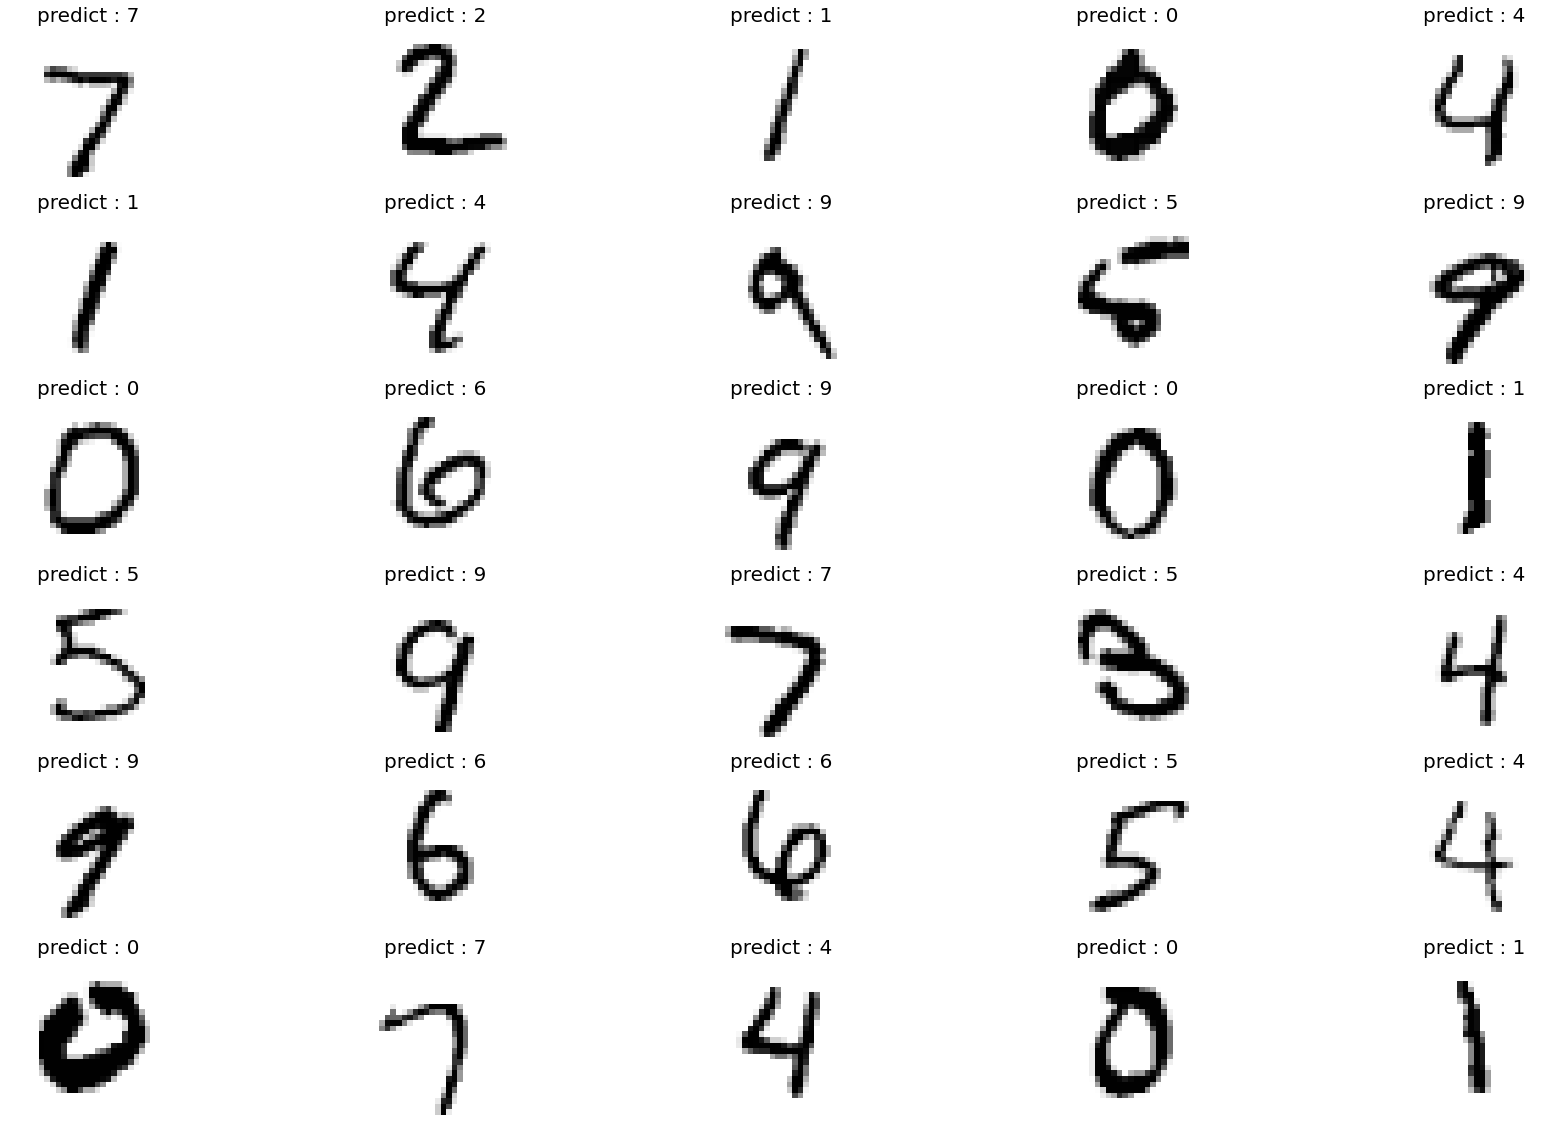

In [29]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure(figsize = (30, 20))
for i in range(30):
  # 6줄 5칸으로 나누고 i+1번째 이미지를 그림
  subplot = fig.add_subplot(6, 5, i + 1)
  # x축을 설정하는 객체 - 데이터가 없으므로 아무 데이터도 출력안하게함
  subplot.set_xticks([])
  # y축 역시 아무 데이터도 출력안되게 함
  subplot.set_yticks([])
  # 이미지 제목으로 예측한 이미지의 이름 출력
  subplot.set_title('predict : %d'% np.argmax(model.predict(X_test), 1)[i], fontsize = 20)
  # 이미지 출력
  subplot.imshow(X_test[i].reshape((28, 28)),
                 cmap = plt.cm.gray_r)
plt.show()